# Exploratory Data Analysis on Breast Cancer Diagnosis Dataset
This notebook presents code used to conduct exploratory data analysis on the Breast Cancer Diagnosis dataset. Exploratory data analysis will help us understand the features and attributes of the dataset better and also help communicate useful insights about the data. Outliers and missing values in the dataset will be will be imputed using approriate methods. The notebook will also visualize the dataset using different plots in order to understand the features in the dataset better. 
After having a clear understanding of the data, we will extract useful features from the dataset and perform feature scaling in order to have the best features for our dataset. The <i>Breast Cancer Diagnosis Dataset<i> can be downloaded <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data"><strong>on Kaggle</a>

## Import Required Packages and Modules

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [2]:
pip install causalnex==0.10

Note: you may need to restart the kernel to use updated packages.


## Load the data into a Pandas DataFrame
We will use a Loader defined in load.py script to load the data into a pandas Datafrma

In [3]:
# add scripts
import sys
import os
sys.path.append(os.path.abspath("../scripts/"))
from load_data import LoadData
loader = LoadData()

In [4]:
diagnosis_df = loader.read_csv("../data/data.csv")
diagnosis_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Breast Cancer Data Exploration

In [5]:
diagnosis_df.shape

(569, 33)

In [6]:
print(f"The dataframe has {len(diagnosis_df.columns.to_list())} columns")
print("The columns in the dataframe are: ")
print(diagnosis_df.columns.to_list())

The dataframe has 33 columns
The columns in the dataframe are: 
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [7]:
print(diagnosis_df.dtypes.to_list())

[dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [8]:
diagnosis_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Observations from the data features:
<ul>
    <li>The dataset is made up of 569 row and 33 columns</li>
    <li>Apart from the diagnosis column which is made up of strings, all the other columns are of type float</li>
    <li>The last column in the dataset ("Unnamed: 32") is does not contain any values. All the other columns do not have any missing values</li>
    
</ul>
  Since the last column in the dataset do not contain any data, we drop it.  
    

In [9]:
diagnosis_df.drop(columns='Unnamed: 32', inplace=True)
diagnosis_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Univariate analysis

In [10]:
# add scripts
sys.path.append(os.path.abspath("../scripts/"))
from utilities import Utilities
utils=Utilities()

### 1. Distribution of Diagnosis

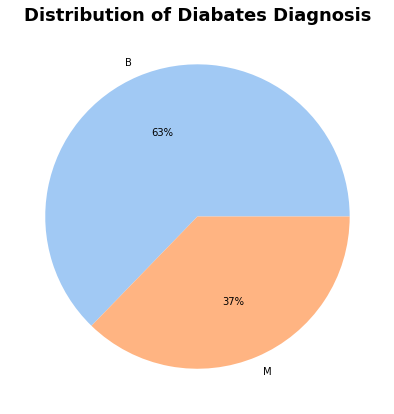

In [11]:
utils.plot_pie(diagnosis_df, 'diagnosis', 'Distribution of Diabates Diagnosis')

### 2. Distribution of radius-mean

<Figure size 648x504 with 0 Axes>

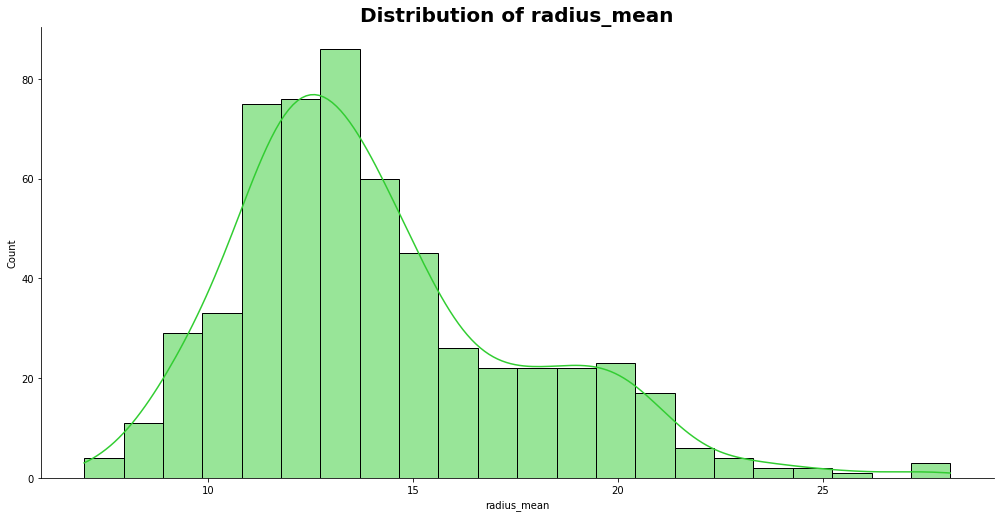

In [13]:
utils.plot_hist(diagnosis_df, 'radius_mean', 'limegreen')

### 3. Distribution of texture_mean

<Figure size 648x504 with 0 Axes>

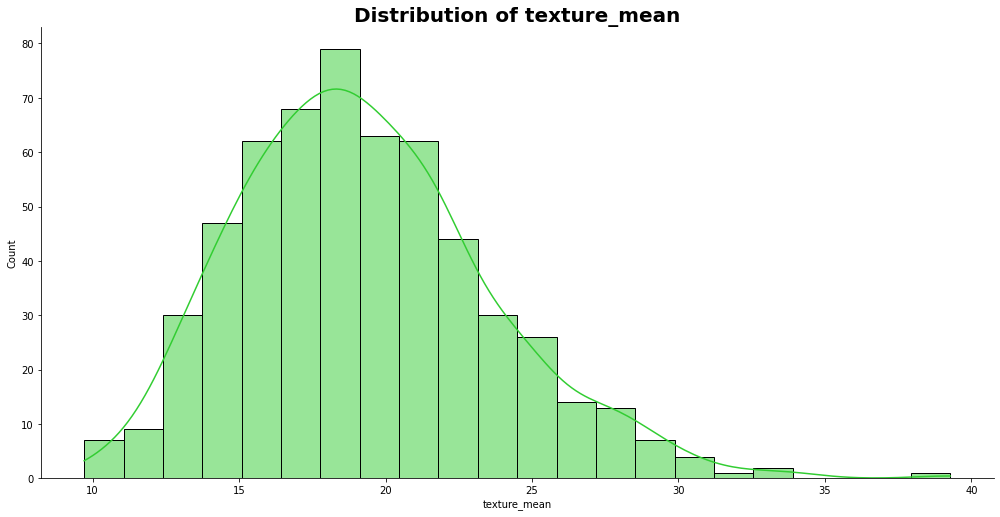

In [14]:
utils.plot_hist(diagnosis_df, 'texture_mean', 'limegreen')

### 4. Distribution of perimeter_mean

<Figure size 648x504 with 0 Axes>

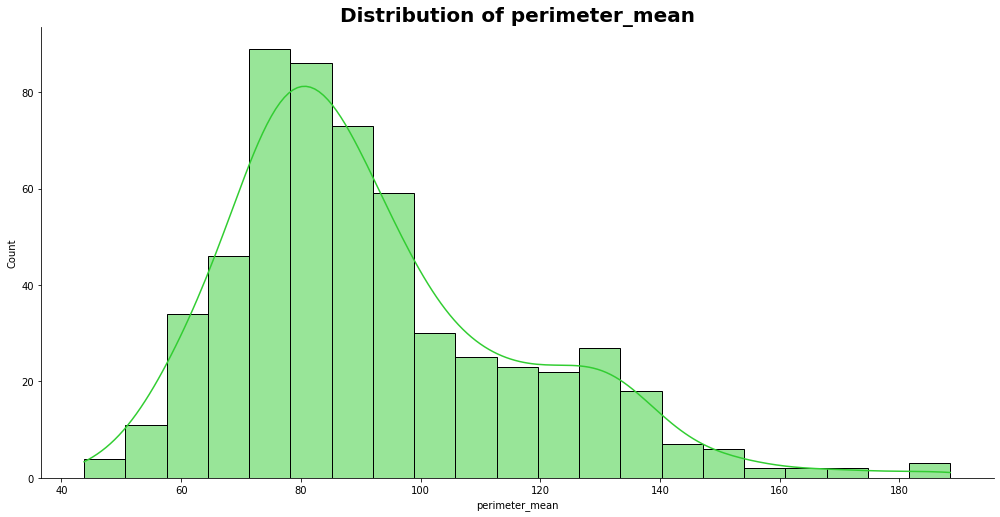

In [15]:
utils.plot_hist(diagnosis_df, 'perimeter_mean', 'limegreen')

### 5. Distribution of area_mean

<Figure size 648x504 with 0 Axes>

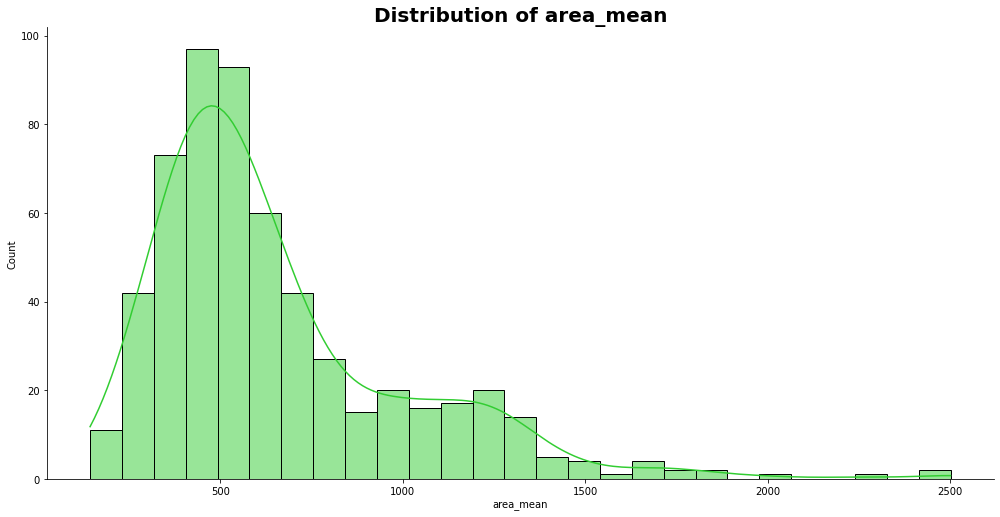

In [16]:
utils.plot_hist(diagnosis_df, 'area_mean', 'limegreen')

### 6. Distribution of smoothness_mean

<Figure size 648x504 with 0 Axes>

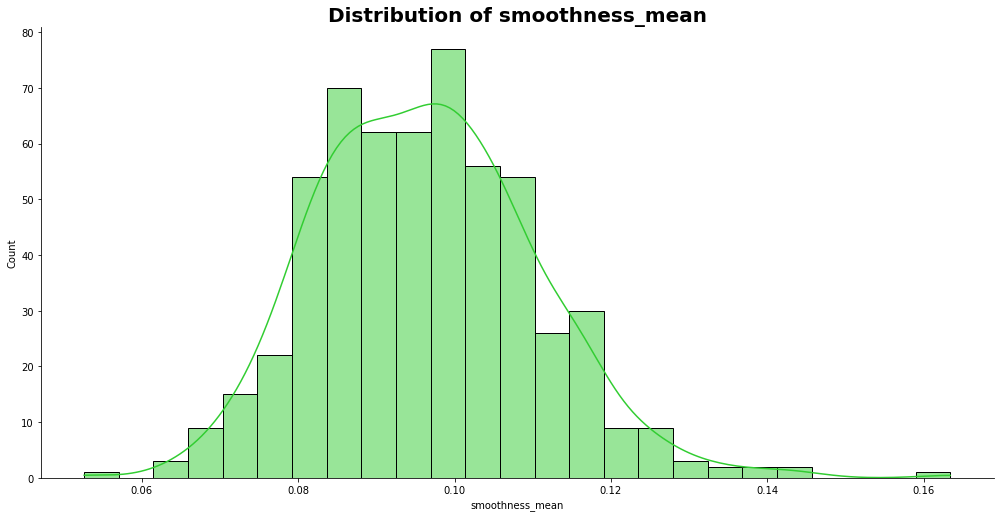

In [17]:
utils.plot_hist(diagnosis_df, 'smoothness_mean', 'limegreen')

### 7. Distribution of compactness_mean

<Figure size 648x504 with 0 Axes>

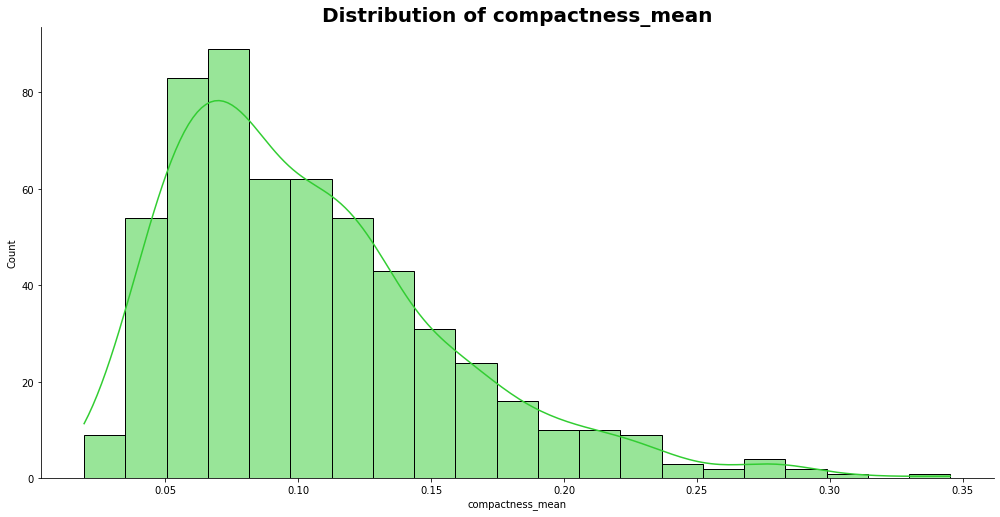

In [18]:
utils.plot_hist(diagnosis_df, 'compactness_mean', 'limegreen')

### 8. Distribution of concavity_mean

<Figure size 648x504 with 0 Axes>

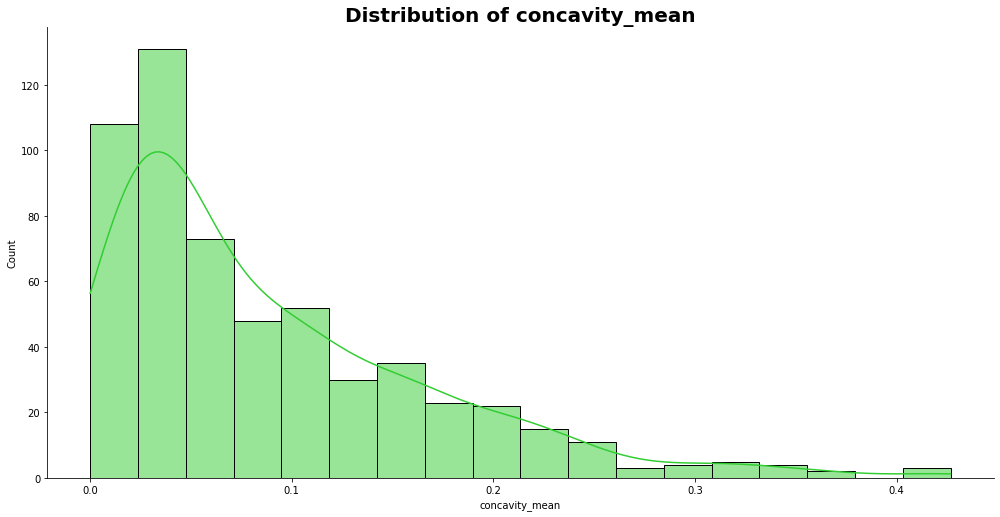

In [19]:
utils.plot_hist(diagnosis_df, 'concavity_mean', 'limegreen')

### 9. Distribution of concave points_mean

<Figure size 648x504 with 0 Axes>

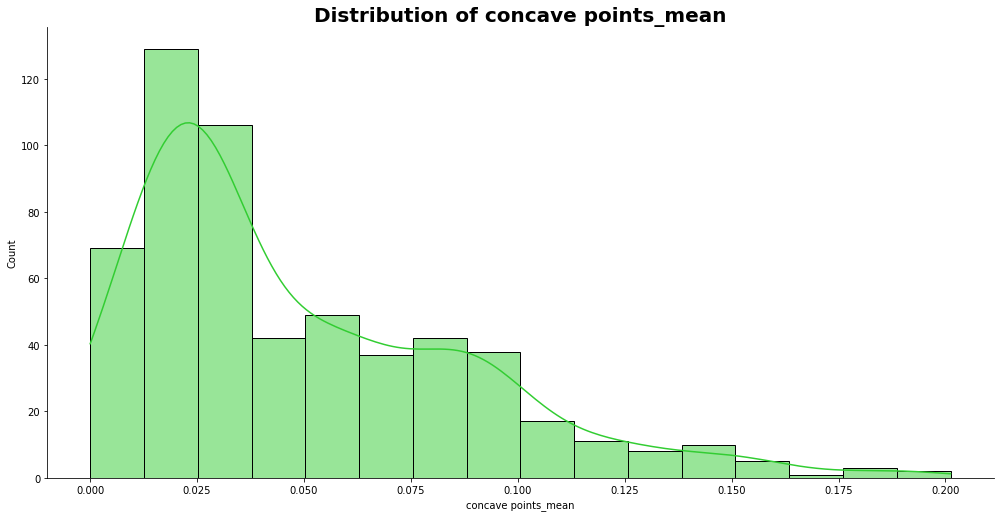

In [20]:
utils.plot_hist(diagnosis_df, 'concave points_mean', 'limegreen')

### 10. Distribution of symmetry_mean

<Figure size 648x504 with 0 Axes>

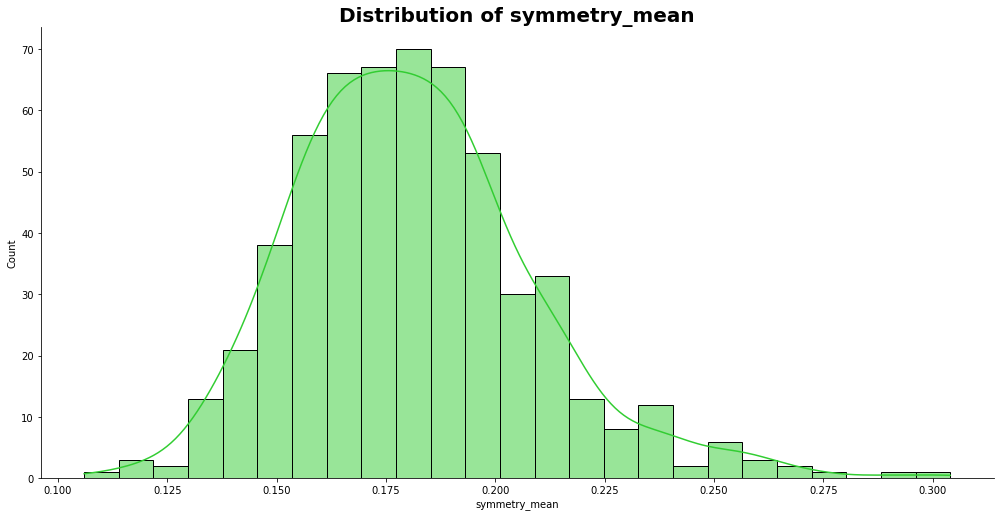

In [21]:
utils.plot_hist(diagnosis_df, 'symmetry_mean', 'limegreen')

### 11. Distribution of fractal_dimension_mean

<Figure size 648x504 with 0 Axes>

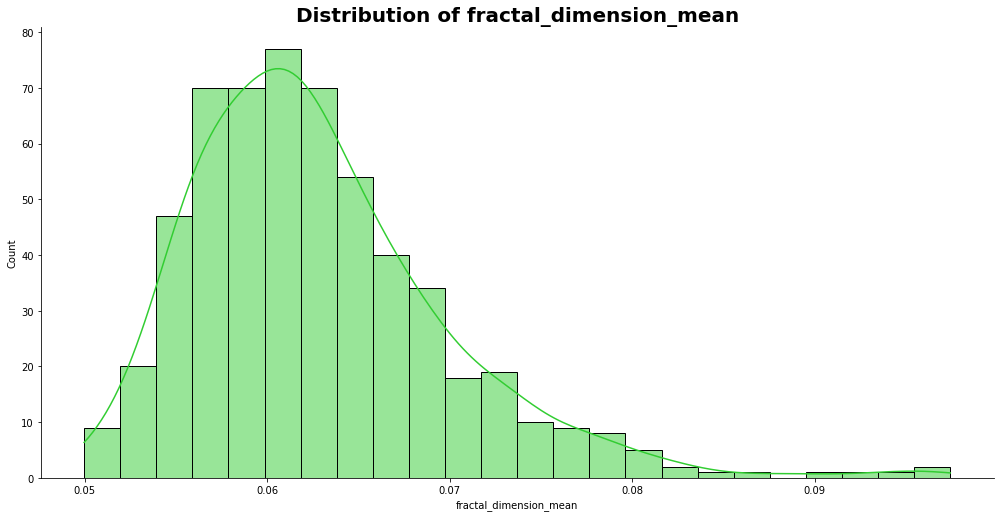

In [24]:
utils.plot_hist(diagnosis_df, 'fractal_dimension_mean', 'limegreen')

## Bivariate Analysis

<Figure size 1152x1224 with 0 Axes>

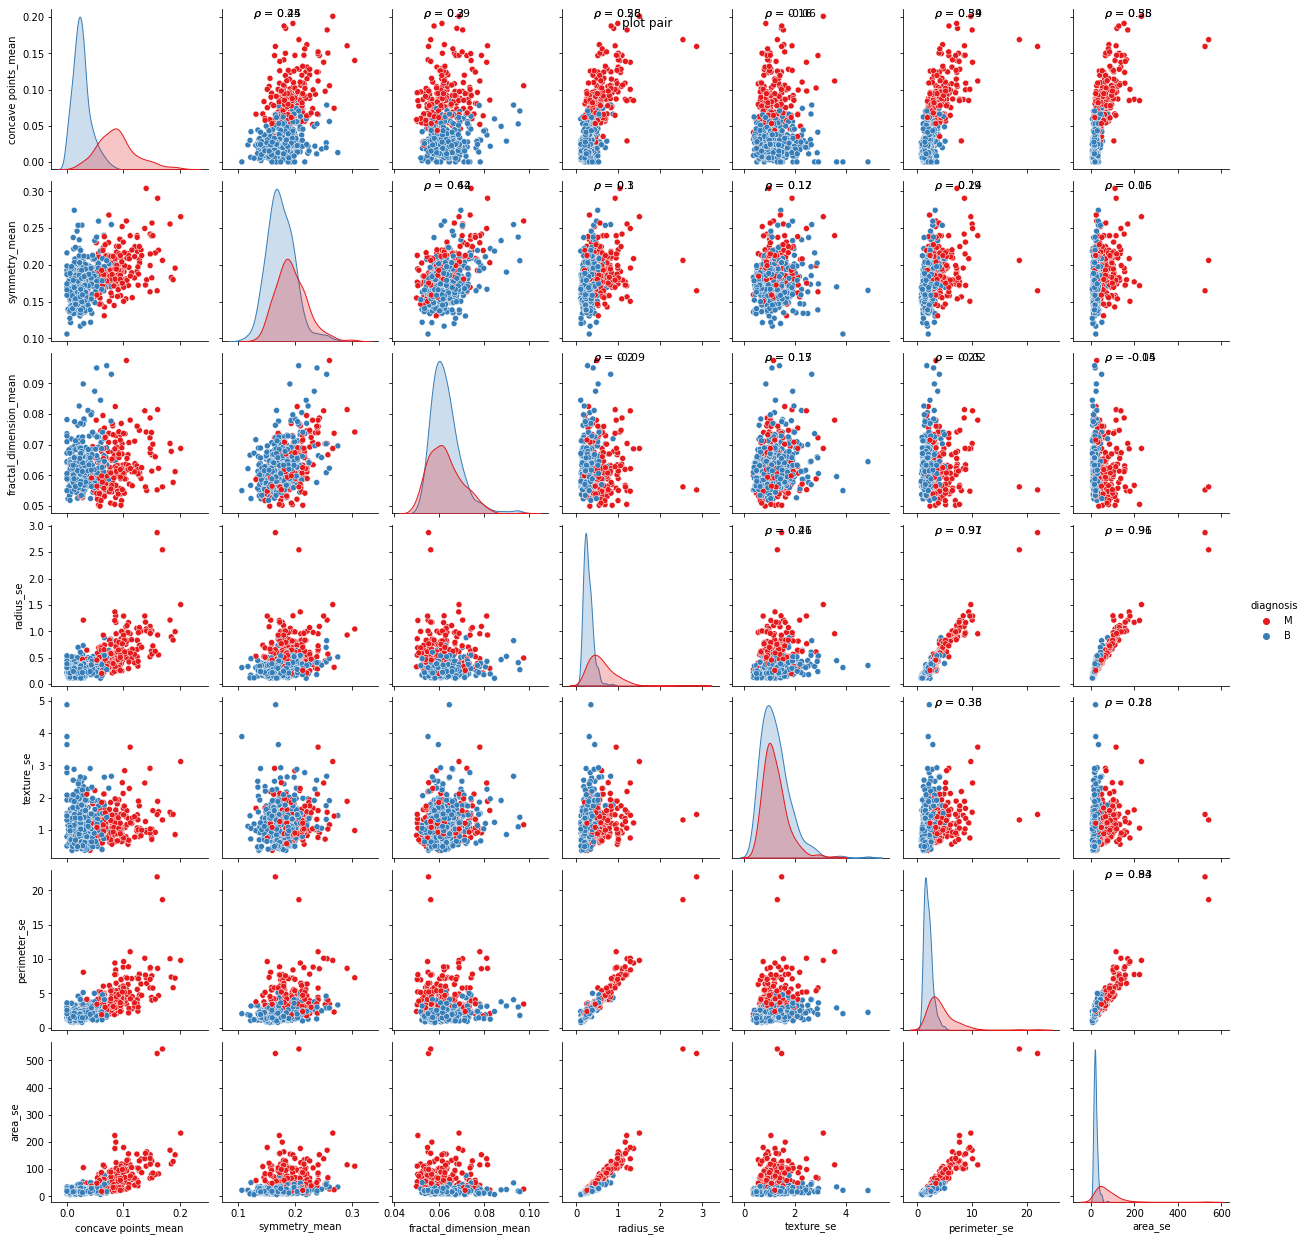

In [25]:
utils.plot_pair(diagnosis_df, "plot pair", [8,15], [16,17])

### Correalation of various features

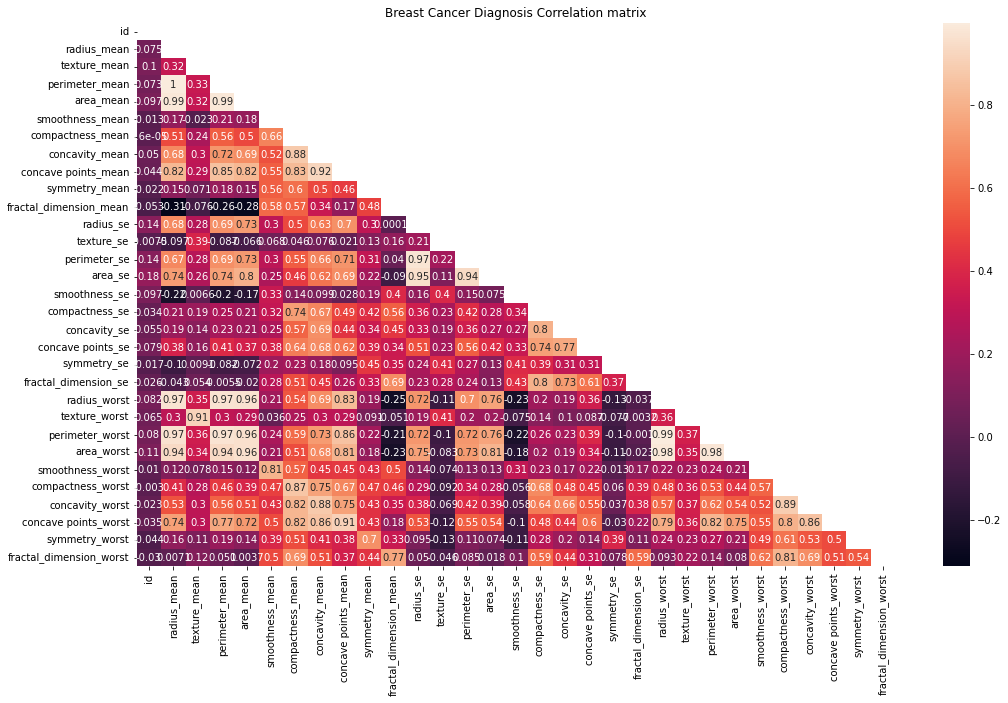

In [26]:
utils.show_corr(diagnosis_df, "Breast Cancer Diagnosis Correlation matrix")